<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-Using-VGG19-and-Resnet50/blob/main/brain_tumor_detection_using_vgg19_and_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Mounted at /content/drive


In [ ]:
import os
from cv2 import imread
import matplotlib.pyplot as plt

import keras
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50, VGG19

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/archive_3"

image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.1)    
dir1='/content/archive_3/train'
training_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 color_mode='rgb',
                                                 class_mode='binary')

Found 1614 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


<h4>Tumour MRI Image</h4>

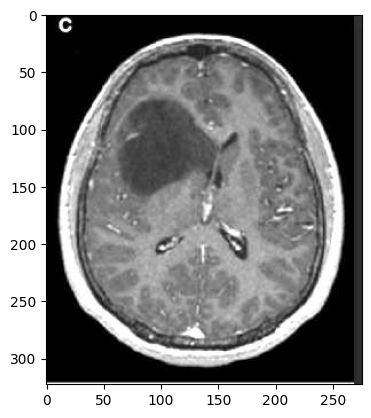

In [ ]:
yes_path = dir1+"/yes/"+os.listdir(dir1+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

<h4>Normal MRI Image</h4>

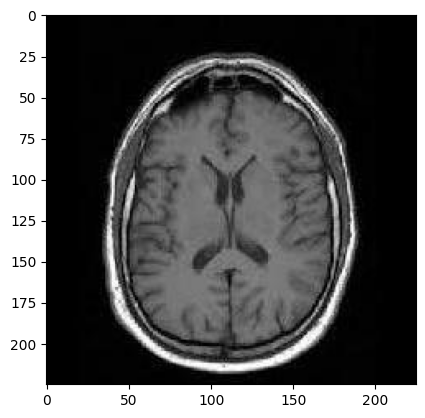

In [ ]:
no_path = dir2+"/no/"+os.listdir(dir2+"/no/")[4]
tumour = imread(no_path)
plt.imshow(tumour)

In [ ]:
training_set.class_indices

{'no': 0, 'yes': 1}

<h3>VGG 19</h3>

In [ ]:
model = VGG19(
      input_shape = (224,224,3),
      include_top = False,
      
    )


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = Dense(1, activation = "sigmoid")(x)


# Create the new model

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 70)

Epoch 1/70
101/101 [==============================] - 26s 128ms/step - loss: 0.5795 - accuracy: 0.8154 - val_loss: 0.2795 - val_accuracy: 0.8667
Epoch 2/70
101/101 [==============================] - 9s 93ms/step - loss: 0.1790 - accuracy: 0.9287 - val_loss: 0.2810 - val_accuracy: 0.8750
Epoch 3/70
101/101 [==============================] - 9s 93ms/step - loss: 0.1400 - accuracy: 0.9461 - val_loss: 0.0720 - val_accuracy: 0.9917
Epoch 4/70
101/101 [==============================] - 9s 88ms/step - loss: 0.1290 - accuracy: 0.9542 - val_loss: 0.1533 - val_accuracy: 0.9333
Epoch 5/70
101/101 [==============================] - 10s 94ms/step - loss: 0.1048 - accuracy: 0.9603 - val_loss: 0.0788 - val_accuracy: 0.9667
Epoch 6/70
101/101 [==============================] - 11s 111ms/step - loss: 0.0814 - accuracy: 0.9709 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/70
101/101 [==============================] - 10s 99ms/step - loss: 0.0527 - accuracy: 0.9802 - val_loss: 0.0153 - val_accuracy: 

In [ ]:
hist = hist.history

In [ ]:
model.evaluate(validation_set )

8/8 [==============================] - 1s 79ms/step - loss: 0.0191 - accuracy: 0.9917


[0.0190613754093647, 0.9916666746139526]

Text(0, 0.5, 'accuracy')

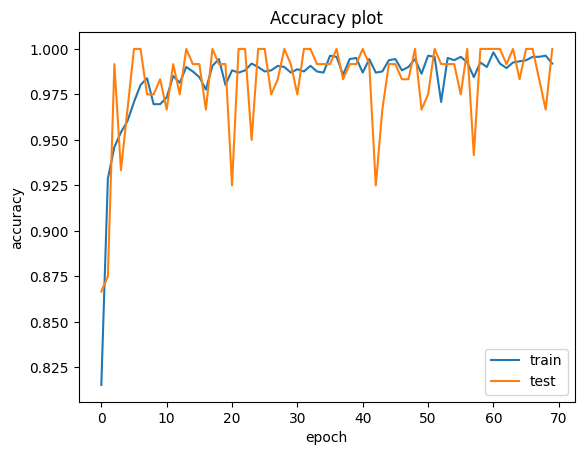

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

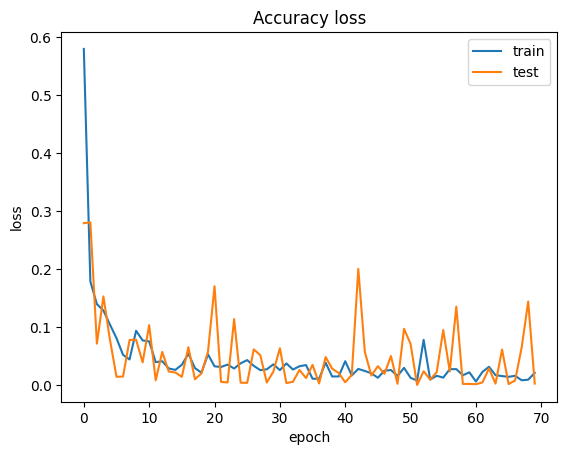

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
import numpy as np

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.75)

test_data = datagen.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)


Found 906 images belonging to 2 classes.
29/29 [==============================] - 19s 504ms/step


In [ ]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

29/29 [==============================] - 13s 449ms/step - loss: 1.0502 - accuracy: 0.7572
Test Loss: 1.05024254322052
Test Accuracy: 0.7571743726730347


1/1 [==============================] - 0s 185ms/step


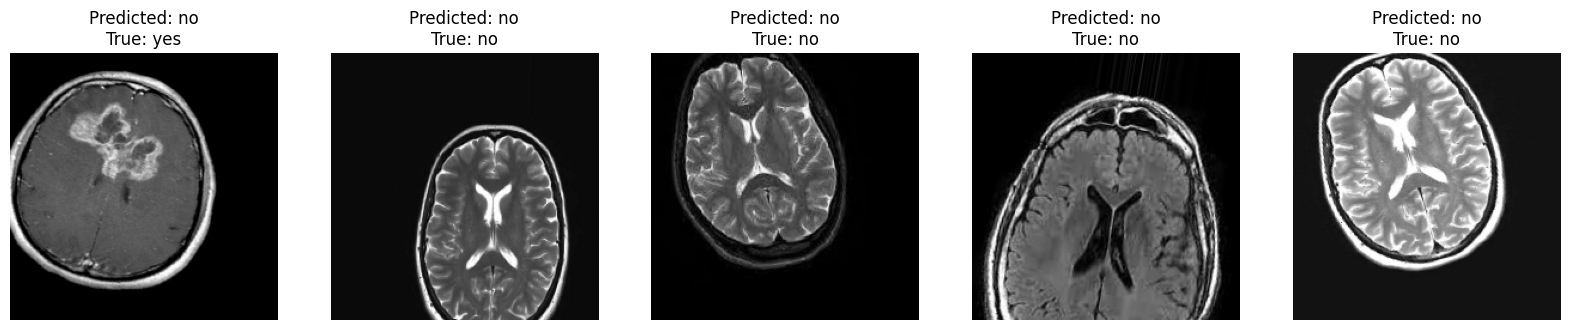

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[16  0]
 [16  0]]


In [ ]:
model.save('/content/archive_3/VGG19withCustomlayer.h5')



<h3>ResNet 50</h3>

In [ ]:
model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      #weights = 'imagenet'
    )


94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 70)

Epoch 1/70
101/101 [==============================] - 15s 95ms/step - loss: 0.7778 - accuracy: 0.7206 - val_loss: 0.4369 - val_accuracy: 0.7917
Epoch 2/70
101/101 [==============================] - 8s 81ms/step - loss: 0.5776 - accuracy: 0.7615 - val_loss: 0.3902 - val_accuracy: 0.8417
Epoch 3/70
101/101 [==============================] - 7s 73ms/step - loss: 0.5271 - accuracy: 0.7918 - val_loss: 0.4133 - val_accuracy: 0.8333
Epoch 4/70
101/101 [==============================] - 8s 82ms/step - loss: 0.5626 - accuracy: 0.7875 - val_loss: 0.3676 - val_accuracy: 0.8667
Epoch 5/70
101/101 [==============================] - 8s 80ms/step - loss: 0.5587 - accuracy: 0.8116 - val_loss: 0.4747 - val_accuracy: 0.8417
Epoch 6/70
101/101 [==============================] - 8s 75ms/step - loss: 0.4247 - accuracy: 0.8302 - val_loss: 0.3208 - val_accuracy: 0.8250
Epoch 7/70
101/101 [==============================] - 8s 83ms/step - loss: 0.4413 - accuracy: 0.8271 - val_loss: 0.5837 - val_accuracy: 0.808

In [ ]:
model.evaluate(validation_set )

8/8 [==============================] - 1s 63ms/step - loss: 0.2288 - accuracy: 0.9333


[0.2287624180316925, 0.9333333373069763]

In [ ]:
hist = hist.history

Text(0, 0.5, 'accuracy')

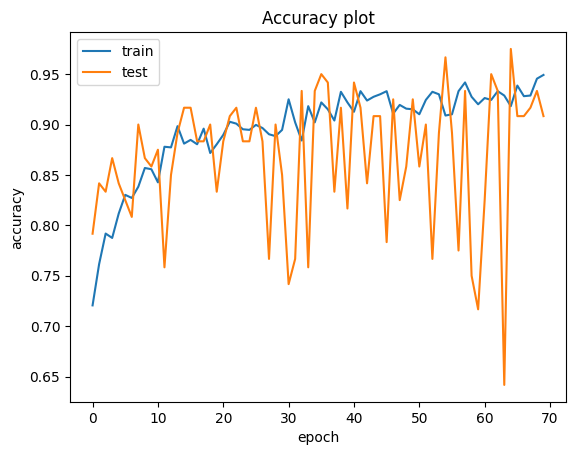

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

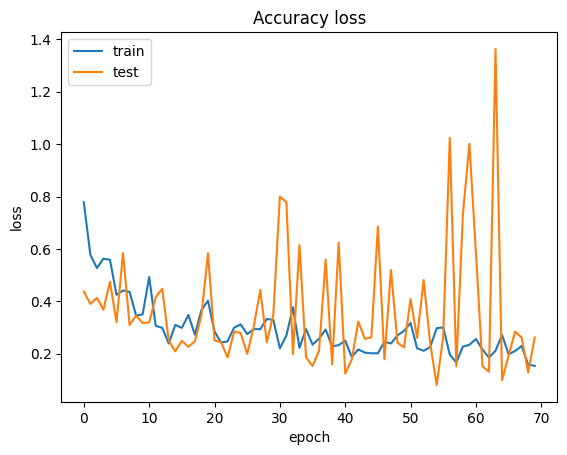

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
import numpy as np

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

test_data = datagen.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)


In [ ]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 [==============================] - 1s 823ms/step


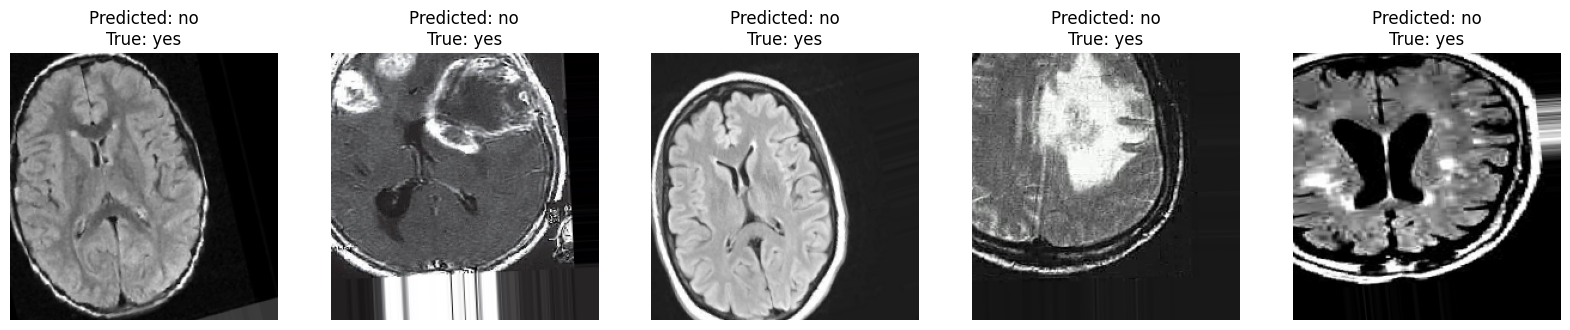

In [ ]:
import matplotlib.pyplot as plt

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_label = np.argmax(test_labels)
true_class_name = class_names[true_label]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_name}")

plt.show()


In [ ]:
model.save('/content/archive_3/ResNetwithCustomlayer.h5')

